In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

import xrft
from mtspec import mtspec

In [2]:
ds = xr.Dataset(coords={'time': ('t', np.arange(1000)*3600.)})
ds = ds.assign(u=np.cos(2.*np.pi*2/86400.*ds.time)+np.random.randn(ds.time.size))
ds = ds.assign(v=np.sin(2.*np.pi*2/86400.*ds.time)+np.random.randn(ds.time.size))
print(ds)

<xarray.Dataset>
Dimensions:  (t: 1000)
Coordinates:
    time     (t) float64 0.0 3.6e+03 7.2e+03 1.08e+04 1.44e+04 1.8e+04 ...
Dimensions without coordinates: t
Data variables:
    u        (t) float64 3.992 1.912 0.212 -0.6522 0.8523 -2.362 -0.4071 ...
    v        (t) float64 -0.7175 -0.1107 1.166 1.8 0.9471 0.7942 0.4398 ...


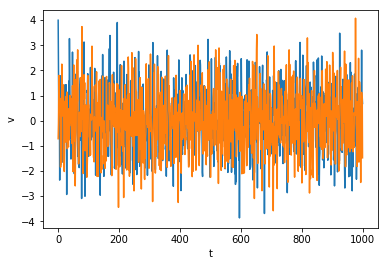

In [3]:
ds.u.plot()
ds.v.plot()

In [4]:
%time u = ds['u']
print(u)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 158 µs
<xarray.DataArray 'u' (t: 1000)>
array([ 3.99238 ,  1.912353,  0.21196 , ..., -0.983911,  0.930736,  0.684755])
Coordinates:
    time     (t) float64 0.0 3.6e+03 7.2e+03 1.08e+04 1.44e+04 1.8e+04 ...
Dimensions without coordinates: t


<xarray.DataArray (freq_t: 1000)>
array([323.025378+0.j, 349.676879+0.j, 238.497662+0.j, ...,  35.890477+0.j,
       238.497662+0.j, 349.676879+0.j])
Coordinates:
  * freq_t          (freq_t) float64 0.0 0.001 0.002 0.003 0.004 0.005 0.006 ...
    freq_t_spacing  float64 0.001


/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xarray/core/ops.py:188: ComplexWarning: Casting complex values to real discards the imaginary part
  return method(*args, **kwargs)


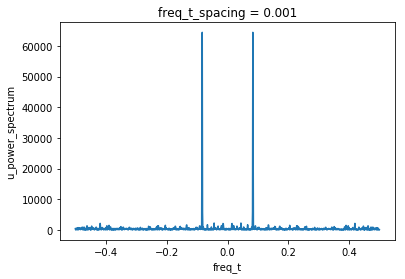

In [5]:
u_fft = xrft.dft(u.fillna(0.), shift=False, detrend='linear', window=True)
E_u = (u_fft*u_fft.conj()).where(u_fft!=0., drop=False)
print(E_u)
E_u = E_u.astype('f8').rename('u_power_spectrum')
np.abs(E_u).plot()

<xarray.DataArray (freq_t: 1000)>
array([4.543839e-28+0.j, 1.331720e+03+0.j, 9.316138e+02+0.j, ...,
       1.166169e+02+0.j, 9.316138e+02+0.j, 1.331720e+03+0.j])
Coordinates:
  * freq_t          (freq_t) float64 0.0 0.001 0.002 0.003 0.004 0.005 0.006 ...
    freq_t_spacing  float64 0.001


/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xarray/core/ops.py:188: ComplexWarning: Casting complex values to real discards the imaginary part
  return method(*args, **kwargs)


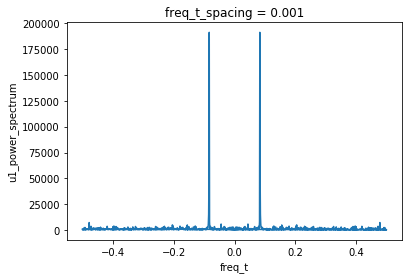

In [6]:
u_fft1 = xrft.dft(u.fillna(0.), shift=False, detrend='linear')
E_u1 = (u_fft1*u_fft1.conj()).where(u_fft1!=0., drop=False)
print(E_u1)
E_u1 = E_u1.astype('f8').rename('u1_power_spectrum')
np.abs(E_u1).plot()

No handles with labels found to put in legend.
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


(1.0, 100000.0)

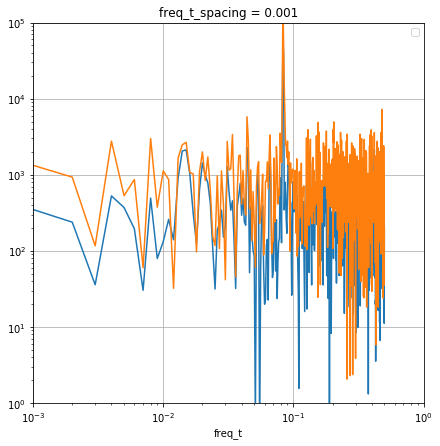

In [7]:

fig, ax = plt.subplots(figsize=(7,7))
E_u.where(E_u.freq_t>0).plot(ax=ax)
ax.legend(); ax.grid()
ax.set_xscale('log'); ax.set_yscale('log')
ax.set_ylabel(''); 
E_u1.where(E_u1.freq_t>0).plot(ax=ax)


ax.set_xlim([1e-3,1e0])
ax.set_ylim([1e0,1e5])


# Complex 

In [8]:
%time uv_complex = (ds['u'] + 1j*ds['v'])
print(uv_complex)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.84 ms
<xarray.DataArray (t: 1000)>
array([ 2.512593+0.438114j,  1.246063+0.531416j, -2.387463+0.694001j, ...,
        0.716301+1.226305j, -0.165184+1.607884j,  1.74936 -0.942426j])
Coordinates:
    time     (t) float64 0.0 3.6e+03 7.2e+03 1.08e+04 1.44e+04 1.8e+04 ...
Dimensions without coordinates: t


<xarray.DataArray (freq_t: 1000)>
array([4.290220e-26+0.j, 2.239723e+03+0.j, 3.079715e+02+0.j, ...,
       1.677480e+03+0.j, 2.276964e+03+0.j, 1.657979e+02+0.j])
Coordinates:
  * freq_t          (freq_t) float64 0.0 0.001 0.002 0.003 0.004 0.005 0.006 ...
    freq_t_spacing  float64 0.001


/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xarray/core/ops.py:188: ComplexWarning: Casting complex values to real discards the imaginary part
  return method(*args, **kwargs)


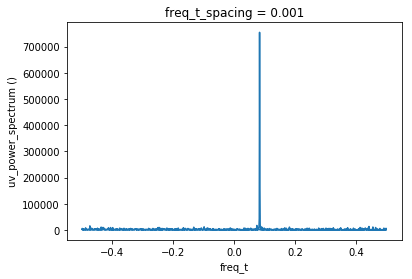

In [9]:
uv_fft = xrft.dft(uv_complex.fillna(0.), shift=False, detrend='linear')
E_uv = (uv_fft*uv_fft.conj()).where(uv_fft!=0., drop=False)
print(E_uv)
E_uv = E_uv.astype('f8').rename('uv_power_spectrum ()')
np.abs(E_uv).plot()

(10.0, 1000000.0)

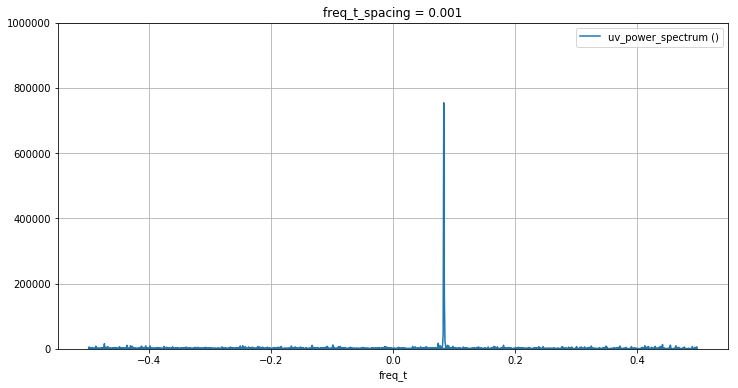

In [10]:

fig, ax = plt.subplots(figsize=(12,6))

E_uv.plot(ax=ax)
ax.legend(); ax.grid()
#ax.set_xscale('log'); ax.set_yscale('log')
ax.set_ylabel(''); 

#ax.set_xlim([1.75*1e-3,1.75*1e-0])
ax.set_ylim([1e1,1e6])

